In [1]:
import os
import pandas as pd

def extract_age_and_gender(filename):
    parts = filename.split('_')
    if len(parts) >= 2:
        age = int(parts[0])
        gender = parts[1]
        # Map '0' to 'male' and '1' to 'female'
        gender = 'male' if gender == '0' else 'female' if gender == '1' else None
        return age, gender
    else:
        return None, None

def create_dataframe_from_photos(folder_path):
    data = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            age, gender = extract_age_and_gender(filename)
            if age is not None and gender is not None:
                data.append([filename, age, gender])

    if data:
        df = pd.DataFrame(data, columns=["file_name", "age", "gender"])
        return df
    else:
        return None



In [2]:
folder_path = "C:/Users/HyperWorks/Downloads/part1"
df1 = create_dataframe_from_photos(folder_path)

In [3]:
folder_path = "C:/Users/HyperWorks/Downloads/part2"
df2 = create_dataframe_from_photos(folder_path)

In [4]:
folder_path = "C:/Users/HyperWorks/Downloads/part3"
df3 = create_dataframe_from_photos(folder_path)

In [5]:
df1

,file_name,age,gender
0,100_1_0_20170110183726390.jpg,100,female
1,100_1_2_20170105174847679.jpg,100,female
2,100_1_2_20170110182836729.jpg,100,female
3,101_1_2_20170105174739309.jpg,101,female
4,10_0_0_20161220222308131.jpg,10,male
...,...,...,...
10131,9_1_3_20161220222856346.jpg,9,female
10132,9_1_3_20170104222949455.jpg,9,female
10133,9_1_4_20170103200637399.jpg,9,female
10134,9_1_4_20170103200814791.jpg,9,female


In [6]:
df2

,file_name,age,gender
0,100_0_0_20170112213500903.jpg,100,male
1,100_0_0_20170112215240346.jpg,100,male
2,100_1_0_20170112213001988.jpg,100,female
3,100_1_0_20170112213303693.jpg,100,female
4,100_1_0_20170112215032192.jpg,100,female
...,...,...,...
10713,9_0_1_20170113175830459.jpg,9,male
10714,9_0_1_20170117195501575.jpg,9,male
10715,9_1_0_20170117172655681.jpg,9,female
10716,9_1_0_20170117180006484.jpg,9,female


In [7]:
df3

,file_name,age,gender
0,100_1_0_20170119212053665.jpg,100,female
1,10_0_0_20170116201102149.jpg,10,male
2,10_0_0_20170120220628194.jpg,10,male
3,10_0_1_20170116225209209.jpg,10,male
4,10_1_1_20170116225209209.jpg,10,female
...,...,...,...
3245,99_1_0_20170120134718759.jpg,99,female
3246,99_1_0_20170120221920654.jpg,99,female
3247,99_1_1_20170120134639935.jpg,99,female
3248,9_0_0_20170120133313910.jpg,9,male


In [8]:
import pandas as pd

combined_df = pd.concat([df1, df2, df3], axis=0)
combined_df.insert(2, 'name', None)

# Reset the index if needed
combined_df.reset_index(drop=True, inplace=True)

print(combined_df)


                           file_name  age  name  gender
0      100_1_0_20170110183726390.jpg  100  None  female
1      100_1_2_20170105174847679.jpg  100  None  female
2      100_1_2_20170110182836729.jpg  100  None  female
3      101_1_2_20170105174739309.jpg  101  None  female
4       10_0_0_20161220222308131.jpg   10  None    male
...                              ...  ...   ...     ...
24099   99_1_0_20170120134718759.jpg   99  None  female
24100   99_1_0_20170120221920654.jpg   99  None  female
24101   99_1_1_20170120134639935.jpg   99  None  female
24102    9_0_0_20170120133313910.jpg    9  None    male
24103    9_0_0_20170120133317677.jpg    9  None    male

[24104 rows x 4 columns]


<AxesSubplot:>

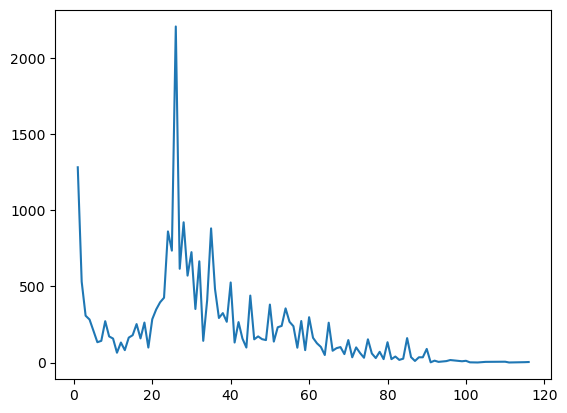

In [9]:
combined_df["age"].value_counts().sort_index().plot()

<AxesSubplot:>

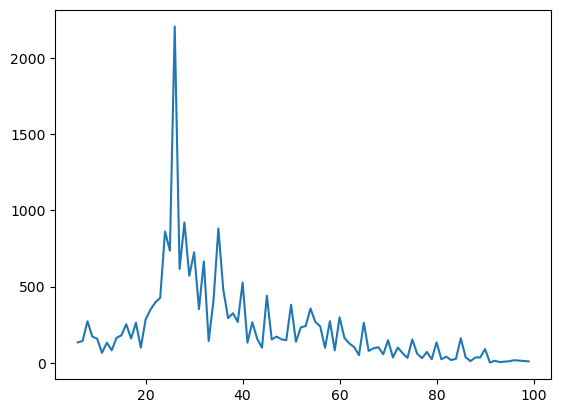

In [10]:
combined_df = combined_df[combined_df["age"] < 100]
combined_df = combined_df[combined_df["age"] > 5]
combined_df["age"].value_counts().sort_index().plot()

In [ ]:
!pip install fastparquet

In [ ]:
!pip install pyarrow

In [15]:
train = combined_df.sample(frac=0.8)
df_left = combined_df.drop(train.index)
val = df_left.sample(frac=0.5)
test = df_left.drop(val.index)

train.to_parquet("C:/Users/HyperWorks/Desktop/PW/IML/UTK/train.parquet", index=False)
val.to_parquet("C:/Users/HyperWorks/Desktop/PW/IML/UTK/val.parquet", index=False)
test.to_parquet("C:/Users/HyperWorks/Desktop/PW/IML/UTK/test.parquet", index=False)